In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing

In [2]:
# reads stars dataset
stars_data = pd.read_csv("/Users/sara/Documents/9000stars.csv")

In [6]:
stars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   psfmag_u  9000 non-null   float64
 1   psfmag_g  9000 non-null   float64
 2   psfmag_r  9000 non-null   float64
 3   psfmag_i  9000 non-null   float64
 4   psfmag_z  9000 non-null   float64
 5   ra        9000 non-null   float64
 6   dec       9000 non-null   float64
dtypes: float64(7)
memory usage: 492.3 KB


In [4]:
stars_data.isnull().sum()

psfmag_u    0
psfmag_g    0
psfmag_r    0
psfmag_i    0
psfmag_z    0
ra          0
dec         0
dtype: int64

In [5]:
# calculates color indices
star_u_g = stars_data['psfmag_u'] - stars_data['psfmag_g']
star_g_r = stars_data['psfmag_g'] - stars_data['psfmag_r']
star_r_i = stars_data['psfmag_r'] - stars_data['psfmag_i']
star_i_z = stars_data['psfmag_i'] - stars_data['psfmag_z']

# creates class column where 1 represents main sequence and red giant stars
c = {'class': [1]*9000}
c1 = pd.DataFrame(c)

# concatenates all new columns in a single dataframe
stars = pd.concat([stars_data['ra'], stars_data['dec'], star_u_g, star_g_r, star_r_i, star_i_z, c1], axis=1)

# relabels the new data frame
stars.columns = ['ra', 'dec', 'u - g', 'g - r', 'r - i', 'i - z', 'class']
stars.head()

,ra,dec,u - g,g - r,r - i,i - z,class
0,185.059755,21.200400,2.580215,1.040095,0.373651,0.257066,1
1,185.907305,22.504748,1.096437,0.302107,0.141417,0.053389,1
2,185.586523,23.457027,1.993011,0.773340,0.287099,0.019375,1
3,187.724806,24.577781,1.888792,0.723919,0.233415,0.132157,1
4,186.968891,19.419215,0.997486,0.224851,0.125817,0.016775,1


In [7]:
# sep parameter removes empty spaces in the dataset
wd_data = pd.read_csv("/Users/sara/Documents/white_dwarfs.csv", sep=r'\s*,\s*')
wd_data.shape

/Users/sara/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(10090, 8)

In [8]:
wd_data.isnull().sum()

Sp_Class     0
u_mag       51
g_mag       51
r_mag       51
i_mag       51
z_mag       51
RA           0
Dec          0
dtype: int64

In [9]:
wd_data.dropna(axis = 0, inplace = True) # drops rows with empty entries
wd_data.reset_index(drop=True, inplace=True) # resets index values
wd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sp_Class  10039 non-null  object 
 1   u_mag     10039 non-null  float64
 2   g_mag     10039 non-null  float64
 3   r_mag     10039 non-null  float64
 4   i_mag     10039 non-null  float64
 5   z_mag     10039 non-null  float64
 6   RA        10039 non-null  float64
 7   Dec       10039 non-null  float64
dtypes: float64(7), object(1)
memory usage: 627.6+ KB


In [10]:
wd = wd_data.head(4000) # pulls 4000 objects fromt the dataset
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sp_Class  4000 non-null   object 
 1   u_mag     4000 non-null   float64
 2   g_mag     4000 non-null   float64
 3   r_mag     4000 non-null   float64
 4   i_mag     4000 non-null   float64
 5   z_mag     4000 non-null   float64
 6   RA        4000 non-null   float64
 7   Dec       4000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


In [11]:
# calculates color indices
wd_u_g = wd['u_mag'] - wd['g_mag']
wd_g_r = wd['g_mag'] - wd['r_mag']
wd_r_i = wd['r_mag'] - wd['i_mag']
wd_i_z = wd['i_mag'] - wd['z_mag']

# creates class column where 2 represents white dwarfs
d = {'class': [2]*4000}
d1 = pd.DataFrame(d)

# concatenates all new columns in a single dataframe
white_dwarfs = pd.concat([wd['RA'], wd['Dec'], wd_u_g, wd_g_r, wd_r_i, wd_i_z, d1], axis=1)

# relabels the new data frame
white_dwarfs.columns = ['ra', 'dec', 'u - g', 'g - r', 'r - i', 'i - z', 'class']
white_dwarfs.head()

,ra,dec,u - g,g - r,r - i,i - z,class
0,0.028147,-0.781616,0.351,-0.049,-0.168,-0.355,2
1,0.029836,-9.727753,-0.144,-0.435,-0.277,-0.875,2
2,0.048182,-8.835651,0.322,0.039,-0.068,-0.219,2
3,0.051346,-0.845157,0.382,0.116,-0.105,0.018,2
4,0.093902,-10.861710,0.394,0.081,-0.076,-0.072,2


In [12]:
# reads quasar dataset
quasar_data = pd.read_csv("/Users/sara/Documents/4000quasars.csv")
quasar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bestpsfmag_u  4001 non-null   float64
 1   bestpsfmag_g  4001 non-null   float64
 2   bestpsfmag_r  4001 non-null   float64
 3   bestpsfmag_i  4001 non-null   float64
 4   bestpsfmag_z  4001 non-null   float64
 5   bestra        4001 non-null   float64
 6   bestdec       4001 non-null   float64
dtypes: float64(7)
memory usage: 218.9 KB


In [13]:
# 4001 sources were pulled because the first row has zero entries, this row needs to be deleted
quasar_data.head()

,bestpsfmag_u,bestpsfmag_g,bestpsfmag_r,bestpsfmag_i,bestpsfmag_z,bestra,bestdec
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,19.212008,18.995501,18.852859,18.525974,18.548332,236.536785,-1.023130
2,19.195280,18.539495,18.331589,18.142981,17.888554,236.803702,-0.996016
3,19.501833,19.106926,18.946705,18.754808,18.662457,236.912099,-0.865047
4,19.028120,18.585810,18.500437,18.566914,18.421614,237.164774,-0.866404


In [14]:
quasar_data.drop(index=0, inplace=True) # deletes first row
quasar_data.reset_index(drop=True, inplace=True) # resets index values
quasar_data.head()

,bestpsfmag_u,bestpsfmag_g,bestpsfmag_r,bestpsfmag_i,bestpsfmag_z,bestra,bestdec
0,19.212008,18.995501,18.852859,18.525974,18.548332,236.536785,-1.023130
1,19.195280,18.539495,18.331589,18.142981,17.888554,236.803702,-0.996016
2,19.501833,19.106926,18.946705,18.754808,18.662457,236.912099,-0.865047
3,19.028120,18.585810,18.500437,18.566914,18.421614,237.164774,-0.866404
4,19.033434,18.770231,18.594955,18.307590,18.170120,237.251915,-0.881905


In [15]:
# calculates color indices
qso_u_g = quasar_data['bestpsfmag_u'] - quasar_data['bestpsfmag_g']
qso_g_r = quasar_data['bestpsfmag_g'] - quasar_data['bestpsfmag_r']
qso_r_i = quasar_data['bestpsfmag_r'] - quasar_data['bestpsfmag_i']
qso_i_z = quasar_data['bestpsfmag_i'] - quasar_data['bestpsfmag_z']

# creates class column where 2 represents white dwarfs
f = {'class': [3]*4000}
f1 = pd.DataFrame(f)

# concatenates all new columns in a single dataframe
quasars = pd.concat([quasar_data['bestra'], quasar_data['bestdec'], qso_u_g, qso_g_r, qso_r_i, qso_i_z, f1], axis=1)

# relabels the new data frame
quasars.columns = ['ra', 'dec', 'u - g', 'g - r', 'r - i', 'i - z', 'class']
quasars.head()

,ra,dec,u - g,g - r,r - i,i - z,class
0,236.536785,-1.023130,0.216507,0.142642,0.326885,-0.022358,3
1,236.803702,-0.996016,0.655785,0.207906,0.188608,0.254427,3
2,236.912099,-0.865047,0.394907,0.160221,0.191897,0.092351,3
3,237.164774,-0.866404,0.442310,0.085373,-0.066477,0.145300,3
4,237.251915,-0.881905,0.263203,0.175276,0.287365,0.137470,3


In [16]:
# splitting datasets: 70% of each dataset will be training data and 30% will be test data

# pulls index that gives 70% of the data
s_index = int(stars.shape[0] * 0.7)
w_index = int(white_dwarfs.shape[0] * 0.7)
q_index = int(quasars.shape[0] * 0.7)

# separates stars dataset
stars_train = stars.iloc[:s_index,:]
stars_test = stars.iloc[s_index:,:]
stars_test.reset_index(drop=True, inplace=True) # resets index values

# separates white dwarfs dataset
wd_train = white_dwarfs.iloc[:w_index,:]
wd_test = white_dwarfs.iloc[w_index:,:]
wd_test.reset_index(drop=True, inplace=True) # resets index values

# separates quasars dataset
quasars_train = quasars.iloc[:q_index,:]
quasars_test = quasars.iloc[q_index:,:]
quasars_test.reset_index(drop=True, inplace=True) # resets index values

In [17]:
# creates training dataset
train_data = pd.concat([stars_train, wd_train, quasars_train], axis=0)
train_data.reset_index(drop=True, inplace=True)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      11900 non-null  float64
 1   dec     11900 non-null  float64
 2   u - g   11900 non-null  float64
 3   g - r   11900 non-null  float64
 4   r - i   11900 non-null  float64
 5   i - z   11900 non-null  float64
 6   class   11900 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 650.9 KB


In [19]:
# creates test dataset
test_data = pd.concat([stars_test, wd_test, quasars_test], axis=0)
test_data.reset_index(drop=True, inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      5100 non-null   float64
 1   dec     5100 non-null   float64
 2   u - g   5100 non-null   float64
 3   g - r   5100 non-null   float64
 4   r - i   5100 non-null   float64
 5   i - z   5100 non-null   float64
 6   class   5100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 279.0 KB


In [20]:
# checking statistics of training data
set_option('precision', 3)
train_data.describe()

,ra,dec,u - g,g - r,r - i,i - z,class
count,11900.000,11900.000,11900.000,11900.000,11900.000,11900.000,11900.000
mean,154.513,19.263,0.992,0.340,0.133,0.049,1.706
std,63.041,16.341,0.751,0.411,0.242,0.211,0.824
min,0.028,-11.221,-2.255,-1.096,-1.887,-2.333,1.000
25%,122.422,13.822,0.357,0.059,-0.003,-0.027,1.000
50%,187.148,19.087,1.027,0.365,0.153,0.061,1.000
75%,191.784,23.868,1.426,0.564,0.250,0.141,2.000
max,359.952,76.320,6.994,3.884,1.868,2.108,3.000


In [21]:
train_data.median()

ra       187.148
dec       19.087
u - g      1.027
g - r      0.365
r - i      0.153
i - z      0.061
class      1.000
dtype: float64

In [22]:
train_data.mode()

,ra,dec,u - g,g - r,r - i,i - z,class
0,34.837,-0.756,0.418,-0.329,-0.237,-0.189,1.0
1,NaN,NaN,NaN,-0.299,NaN,NaN,NaN
2,NaN,NaN,NaN,-0.265,NaN,NaN,NaN
3,NaN,NaN,NaN,-0.256,NaN,NaN,NaN
4,NaN,NaN,NaN,-0.055,NaN,NaN,NaN


In [23]:
# Skewness Values
skew = train_data.skew()
skew

ra      -0.954
dec      0.647
u - g    0.496
g - r    0.338
r - i    0.410
i - z   -0.443
class    0.590
dtype: float64

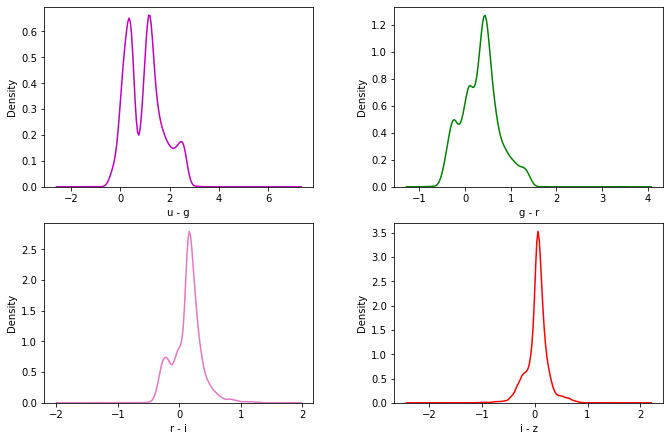

In [24]:
# Skewness Visualization

color_indices = ['u - g', 'g - r', 'r - i', 'i - z']
color = ['m', 'g', 'tab:pink', 'r']
fig= plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.1, right=0.96, bottom=0.05,top=0.6, wspace=0.3)
j = 1
for i in color_indices:
    ax = fig.add_subplot(2,2,j)
    sns.kdeplot(train_data[i], color=color[j-1])
    j+=1

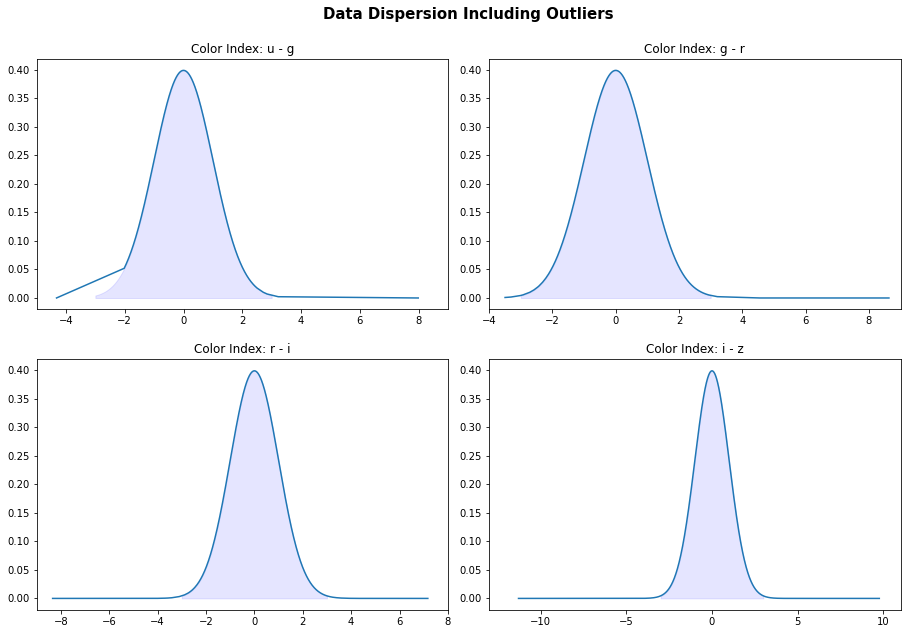

In [25]:
fig= plt.figure(figsize=(15,9)) # Defines figure size

fig.subplots_adjust(left=0.1, right=0.90, bottom=0.05,top=0.9, wspace=0.1) # Defines subplot spacing

fig.suptitle('Data Dispersion Including Outliers', fontsize=15, fontweight='bold')

j = 1

for i in color_indices:
    ax = fig.add_subplot(2,2,j) # identifies location of subplot
    x = preprocessing.scale(train_data[i]) # scales data to standard deviations
    x.sort() # sorts feature data in ascending order
    
    mu = x.mean()
    sigma = x.std()

    y = norm.pdf(x, mu, sigma) # normalizes the data
    
    x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, len(x)) # creates points to fill plot up to 3 standard deviations
    y1 = norm.pdf(x1, mu, sigma)
    
    ax.plot(x,y) 
    ax.fill_between(x1, y1, 0, alpha=0.1, color='b')

    ax.set_title('Color Index: ' + i)
    
    if i == 'u - g':
        ax.set_xlim([-5,9])
    elif i == 'g - r':
        ax.set_xlim([-4,9])
    elif i == 'r - i':
        ax.set_xlim([-9,8])
    else:
        ax.set_xlim([-13,11])

    j+=1

In [26]:
# computing z-score
from scipy import stats
z_score = np.abs(stats.zscore(train_data))
threshold = 3
train = train_data[(z_score <= 3).all(axis=1)]

In [27]:
train.reset_index(drop=True, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      11573 non-null  float64
 1   dec     11573 non-null  float64
 2   u - g   11573 non-null  float64
 3   g - r   11573 non-null  float64
 4   r - i   11573 non-null  float64
 5   i - z   11573 non-null  float64
 6   class   11573 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 633.0 KB


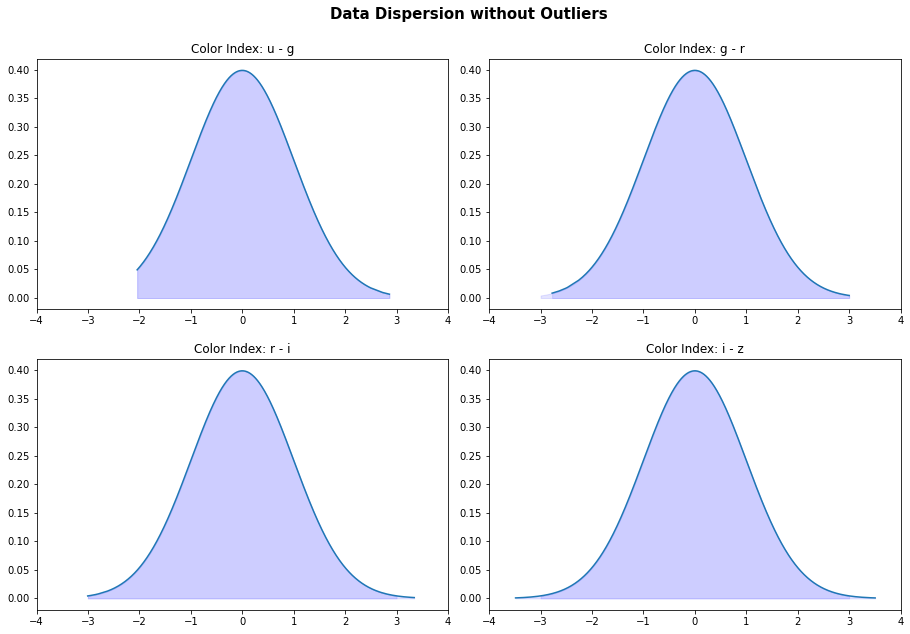

In [29]:
# displays data dispersion after outliers are dropped
fig= plt.figure(figsize=(15,9)) # Defines figure size

fig.subplots_adjust(left=0.1, right=0.90, bottom=0.05,top=0.9, wspace=0.1) # Defines subplot spacing

fig.suptitle('Data Dispersion without Outliers', fontsize=15, fontweight='bold')

j = 1

for i in color_indices:
    ax = fig.add_subplot(2,2,j) # identifies location of subplot
    x = preprocessing.scale(train[i])
    x.sort() # sorts feature data in ascending order
    
    mu = x.mean()
    sigma = x.std()
    
    y = norm.pdf(x, mu, sigma) # normalizes the data
    
    x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, len(x))
    y1 = norm.pdf(x1, mu, sigma)
    
    x2 = np.linspace(mu - 2*sigma, mu + 2*sigma, len(x))
    y2 = norm.pdf(x2, mu, sigma)
    
    ax.plot(x,y)

    ax.set_title('Color Index: ' + i)
    ax.set_xlim([-4,4])
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    if i == 'u - g':
        ax.fill_between(x,y,0, alpha=0.1, color='b')
    elif i == 'g - r':
        ax.fill_between(x1,y1,0, alpha=0.1, color='b')
    elif i == 'r - i':
        ax.fill_between(x1,y1,0, alpha=0.1, color='b')
    else:
        ax.fill_between(x1,y1,0, alpha=0.1, color='b')
    j+=1

array([[<AxesSubplot:title={'center':'u - g'}>,
        <AxesSubplot:title={'center':'g - r'}>],
       [<AxesSubplot:title={'center':'r - i'}>,
        <AxesSubplot:title={'center':'i - z'}>]], dtype=object)

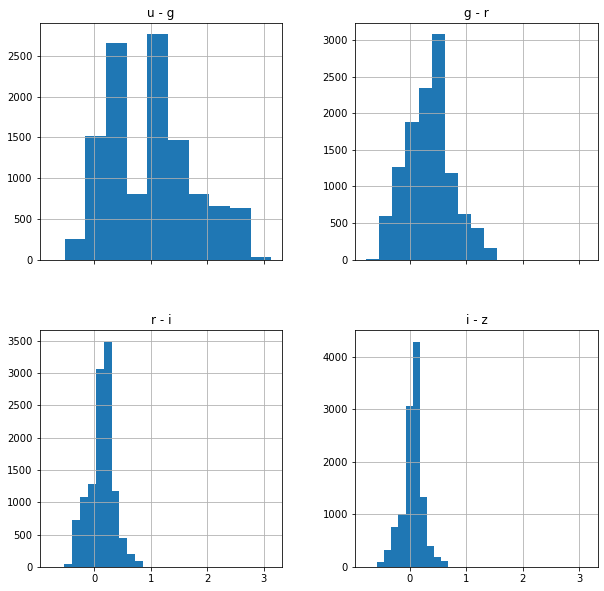

In [30]:
# histograms for color indices 
train.hist(['u - g', 'g - r', 'r - i', 'i - z'], sharex=True, figsize=(10,10))

In [31]:
# min-max normalization using this in the report
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

train1 = train.drop(columns=['ra', 'dec', 'class'])

train_norm = pd.DataFrame(min_max.fit_transform(train1), columns=['u - g', 'g - r', 'r - i', 'i - z'])

array([[<AxesSubplot:title={'center':'u - g'}>,
        <AxesSubplot:title={'center':'g - r'}>],
       [<AxesSubplot:title={'center':'r - i'}>,
        <AxesSubplot:title={'center':'i - z'}>]], dtype=object)

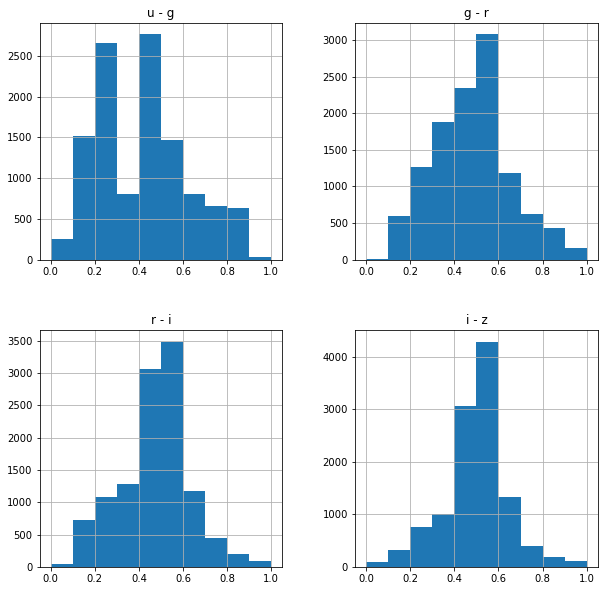

In [32]:
train_norm.hist(figsize=(10,10))

In [33]:
# reconcatenating data set
norm_train = train.drop(columns=['u - g', 'g - r', 'r - i', 'i - z'])
final_train = pd.concat([norm_train['ra'], norm_train['dec'], train_norm['u - g'], train_norm['g - r'], 
                        train_norm['r - i'], train_norm['i - z'], norm_train['class']], axis=1)
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      11573 non-null  float64
 1   dec     11573 non-null  float64
 2   u - g   11573 non-null  float64
 3   g - r   11573 non-null  float64
 4   r - i   11573 non-null  float64
 5   i - z   11573 non-null  float64
 6   class   11573 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 633.0 KB


In [34]:
# Class count for final training set
class_counts = final_train.groupby('class').size()
class_counts

class
1    6267
2    2598
3    2708
dtype: int64

In [35]:
star_class = class_counts[1]/final_train['class'].size # 0.54
wd_class = class_counts[2]/final_train['class'].size # 0.22
quasar_class = class_counts[3]/final_train['class'].size # 0.24

In [36]:
star_class/wd_class

2.412240184757506

In [37]:
star_class/quasar_class

2.3142540620384047

In [38]:
wd_class/quasar_class

0.9593796159527327

In [39]:
# cleaning test data
from scipy import stats
z_score = np.abs(stats.zscore(test_data))
threshold = 3
clean_test = test_data[(z_score <= 3).all(axis=1)]

In [40]:
clean_test.reset_index(drop=True, inplace=True)
clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      4858 non-null   float64
 1   dec     4858 non-null   float64
 2   u - g   4858 non-null   float64
 3   g - r   4858 non-null   float64
 4   r - i   4858 non-null   float64
 5   i - z   4858 non-null   float64
 6   class   4858 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 265.8 KB


In [41]:
# normalize test data
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

test1 = clean_test.drop(columns=['ra', 'dec', 'class'])

test_norm = pd.DataFrame(min_max.fit_transform(test1), columns=['u - g', 'g - r', 'r - i', 'i - z'])

In [42]:
# reconcatenating test dataset
norm_test = clean_test.drop(columns=['u - g', 'g - r', 'r - i', 'i - z'])
final_test = pd.concat([norm_test['ra'], norm_test['dec'], test_norm['u - g'], test_norm['g - r'], 
                        test_norm['r - i'], test_norm['i - z'], norm_test['class']], axis=1)
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      4858 non-null   float64
 1   dec     4858 non-null   float64
 2   u - g   4858 non-null   float64
 3   g - r   4858 non-null   float64
 4   r - i   4858 non-null   float64
 5   i - z   4858 non-null   float64
 6   class   4858 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 265.8 KB


In [43]:
# Saving clean training data and test data to files
final_train.to_csv("/Users/sara/Documents/training_set.csv", index=False)
final_test.to_csv("/Users/sara/Documents/test_set.csv", index=False)